# Practice Sessions 01–02: Data Preparation (EDA + Feature Engineering)


In many real-world projects, the biggest time sink is not the model — it’s getting the data into a shape you can trust.
This notebook is a guided “first contact” with a new dataset: explore it, clean it, and build a few useful features.

You will do two things in order:

**1) Exploratory Data Analysis (EDA)**
- Check column types and basic completeness
- Summarize numeric columns (mean, spread, quantiles)
- Look at distributions and spot outliers
- Inspect simple correlations

**2) Feature engineering**
- Decide what to do with missing values
- Work with date-like columns and time gaps
- Scale numeric variables
- Encode categorical variables
- Create a few aggregated features
- Split the data into train/test parts

**Workflow tip (important):** keep a “raw” dataframe unchanged, and create copies for each stage  
(`input_dataset_raw → input_dataset_clean → input_dataset_features`). That makes it much easier to rerun sections without accidentally
stacking transformations on top of each other.


Fill in:

- **Name:** 
- **Email:** 
- **Date:**


# 0. The dataset

The file `device_db.csv` contains one row per customer purchase event (a customer buys a new phone).
Your first job is to understand what each column *means* and what each column *looks like*.

Columns you will see in this notebook (names matter — keep them exactly as written):

- **PURCHASED_DEVICE**: the phone that was bought (text)
- **DEVICE_VALUE**: price/cost of the bought phone (numeric)
- **LAST_DEVICE_CHANGE** (or similar date field): when the previous phone was last changed (date-like)
- **DATA_TRAFFIC_MONTH_1 … DATA_TRAFFIC_MONTH_6**: data usage for six months before the purchase (numeric)
- **VOICE_TRAFFIC_MONTH_1 … VOICE_TRAFFIC_MONTH_6**: voice minutes for six months before the purchase (numeric)
- **BILLING_MONTH_1 … BILLING_MONTH_6**: monthly bill for six months before the purchase (numeric)
- **DEVICE_COST_MONTH_1 … DEVICE_COST_MONTH_6**: monthly device-related cost for six months before the purchase (numeric)
- **LINE_ACTIVATION_DATE**: when the mobile line was activated (date-like)
- **MONTHS_LAST_DEVICE**: how many months the previous phone was used (numeric)
- **DURATION_LINE**: how long the customer has had the line (numeric)
- **PREVIOUS_DEVICE_MODEL / PREVIOUS_DEVICE_MANUF / PREVIOUS_DEVICE_BRAND**: previous phone information (text)

If anything in this list doesn’t match what you see after loading the CSV, trust the dataframe and adapt accordingly.


# 1. Exploratory data analysis


EDA is like a quick “health check” for your dataset.
You’re looking for obvious surprises: wrong types, weird ranges, missing values, heavy skew, outliers, and simple relationships.
The goal is not to build a perfect model yet — it’s to understand what you’re holding.


In [ ]:


import pandas as pd
import seaborn as sns
import datetime

import numpy as np
from numpy import array
from numpy import argmax

import matplotlib.pyplot as plt
from matplotlib import pyplot

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

The code cell below loads the CSV into a pandas DataFrame named `iinput_dataset`.
Run it, then take a quick look (for example: `head()`, `columns`, and `dtypes`) so you know what is inside.


In [ ]:
# LEAVE AS-IS

input_dataset = pd.read_csv("device_db.csv", sep=",")

: 

## 1.1. Data types and simple statistics


A fast way to summarize a DataFrame is `describe()`.  
For numeric columns it reports: **count, mean, std, min, 25%, 50%, 75%, max**.

(Later you can explore options like including non-numeric columns too, but start simple first.)


**Your task (code):**  
Turn this cell into a *code cell*. Use `describe()` on `iinput_dataset` and display the result.


In [ ]:
import pandas as pd
import seaborn as sns
import datetime
import numpy as np
from numpy import array
from numpy import argmax
import matplotlib.pyplot as plt
from matplotlib import pyplot
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
input_dataset = pd.read_csv("device_db.csv")
print(input_dataset.describe())

       DEVICE_VALUE  LAST_DEVICE_CHANGE  DATA_TRAFFIC_MONTH_1  \
count   9690.000000        7.682000e+03           8868.000000   
mean     750.484211        2.016698e+07           3481.825663   
std      979.710272        1.092577e+04           6364.542706   
min       15.000000        2.012100e+07              0.000000   
25%      297.000000        2.016080e+07             51.923114   
50%      393.000000        2.017060e+07           1208.728050   
75%      609.000000        2.017100e+07           4249.164900   
max     9057.000000        2.019050e+07         127017.590000   

       DATA_TRAFFIC_MONTH_2  DATA_TRAFFIC_MONTH_3  DATA_TRAFFIC_MONTH_4  \
count           8841.000000           8846.000000           8817.000000   
mean            3649.957795           3653.426959           3269.440625   
std             6444.357603           6382.603999           5675.546606   
min                0.000000              0.000000              0.000000   
25%               46.542538            

**Your task (short explanation):**  
In 3–6 sentences, explain what the rows of `describe()` mean:

- What does **count** measure?
- What do **mean** and **std** tell you?
- What are **25% / 50% / 75%**?
- Why can **count** be smaller than the total number of rows?


In [ ]:
print(iinput_dataset.dtypes)

PURCHASED_DEVICE          object
DEVICE_VALUE             float64
LAST_DEVICE_CHANGE       float64
DATA_TRAFFIC_MONTH_1     float64
DATA_TRAFFIC_MONTH_2     float64
DATA_TRAFFIC_MONTH_3     float64
DATA_TRAFFIC_MONTH_4     float64
DATA_TRAFFIC_MONTH_5     float64
DATA_TRAFFIC_MONTH_6     float64
VOICE_TRAFFIC_MONTH_1    float64
VOICE_TRAFFIC_MONTH_2    float64
VOICE_TRAFFIC_MONTH_3    float64
VOICE_TRAFFIC_MONTH_4    float64
VOICE_TRAFFIC_MONTH_5    float64
VOICE_TRAFFIC_MONTH_6    float64
BILLING_MONTH_1          float64
BILLING_MONTH_2          float64
BILLING_MONTH_3          float64
BILLING_MONTH_4          float64
BILLING_MONTH_5          float64
BILLING_MONTH_6          float64
DEVICE_COST_MONTH_1      float64
DEVICE_COST_MONTH_2      float64
DEVICE_COST_MONTH_3      float64
DEVICE_COST_MONTH_4      float64
DEVICE_COST_MONTH_5      float64
DEVICE_COST_MONTH_6      float64
LINE_ACTIVATION_DATE     float64
MONTHS_LAST_DEVICE       float64
DURATION_LINE            float64
PREVIOUS_D

`describe()` returns a DataFrame — and you can build DataFrames yourself too.
Here is a tiny example using a list of dictionaries:

```python
records = [
    {"animal": "cat", "legs": 4},
    {"animal": "spider", "legs": 8},
    {"animal": "bird", "legs": 2},
]
demo_input_dataset = pd.DataFrame(records)
display(demo_input_dataset)
```


Now create a “column dictionary” for the dataset.

Build a dataframe named `column_type_input_dataset` with **one row per column** and at least these fields:

- column name  
- dtype  
- number of distinct values (unique count)  
- number of missing values  
- size (number of rows)

Helpful pandas tools (choose your own approach):
- `iinput_dataset.dtypes`
- `iinput_dataset[col].nunique()`
- `iinput_dataset[col].isna().sum()`
- `iinput_dataset[col].size`


In [ ]:
column_info = []
for col in iinput_dataset.columns:
    column_info.append({
        'column_name': col,
        'dtype': iinput_dataset[col].dtype,
        'unique_count': iinput_dataset[col].nunique(),
        'missing_count': iinput_dataset[col].isna().sum(),
        'size': iinput_dataset[col].size
    })

**Your task (code):**  
Turn this cell into a *code cell* and create `column_type_input_dataset` as described above. Display it.

Quick check: the **size** should be the same for every column (it should match the number of rows).


In [ ]:
column_info = []
for col in iinput_dataset.columns:
    column_info.append({
        'column_name': col,
        'dtype': iinput_dataset[col].dtype,
        'unique_count': iinput_dataset[col].nunique(),
        'missing_count': iinput_dataset[col].isna().sum(),
        'size': iinput_dataset[col].size
    })
column_type_input_dataset = pd.DataFrame(column_info)
print(column_type_input_dataset)

              column_name    dtype  unique_count  missing_count   size
0        PURCHASED_DEVICE   object           101            147  10000
1            DEVICE_VALUE  float64           368            310  10000
2      LAST_DEVICE_CHANGE  float64            76           2318  10000
3    DATA_TRAFFIC_MONTH_1  float64          7215           1132  10000
4    DATA_TRAFFIC_MONTH_2  float64          7182           1159  10000
5    DATA_TRAFFIC_MONTH_3  float64          7176           1154  10000
6    DATA_TRAFFIC_MONTH_4  float64          7124           1183  10000
7    DATA_TRAFFIC_MONTH_5  float64          7173           1134  10000
8    DATA_TRAFFIC_MONTH_6  float64          7074           1465  10000
9   VOICE_TRAFFIC_MONTH_1  float64          3550           1132  10000
10  VOICE_TRAFFIC_MONTH_2  float64          3346           1159  10000
11  VOICE_TRAFFIC_MONTH_3  float64          3332           1154  10000
12  VOICE_TRAFFIC_MONTH_4  float64          3370           1183  10000
13  VO

A single column of a DataFrame is a **Series**. You can access it with:

- `iinput_dataset["DEVICE_VALUE"]`  (recommended)
- `iinput_dataset.DEVICE_VALUE`     (works only when the name is a valid attribute)

Once you have a Series, you can use NumPy functions such as `np.nanmean`, `np.nanmedian`, etc.
The `nan*` versions ignore missing values.

If you want floats to print with one decimal place in this notebook:

```python
pd.options.display.float_format = "{:.1f}".format
```


In [ ]:
# Lọc chỉ các cột số
float_cols = iinput_dataset.select_dtypes(include=['float64']).columns

# Tính mean và median
for col in float_cols:
    print(f"{col}:")
    print(f"  Mean: {iinput_dataset[col].mean():.1f}")
    print(f"  Median: {iinput_dataset[col].median():.1f}")

DEVICE_VALUE:
  Mean: 750.5
  Median: 393.0
LAST_DEVICE_CHANGE:
  Mean: 20166984.8
  Median: 20170601.0
DATA_TRAFFIC_MONTH_1:
  Mean: 3481.8
  Median: 1208.7
DATA_TRAFFIC_MONTH_2:
  Mean: 3650.0
  Median: 1295.0
DATA_TRAFFIC_MONTH_3:
  Mean: 3653.4
  Median: 1310.7
DATA_TRAFFIC_MONTH_4:
  Mean: 3269.4
  Median: 1176.5
DATA_TRAFFIC_MONTH_5:
  Mean: 3673.4
  Median: 1287.1
DATA_TRAFFIC_MONTH_6:
  Mean: 3427.7
  Median: 1277.1
VOICE_TRAFFIC_MONTH_1:
  Mean: 154.9
  Median: 84.0
VOICE_TRAFFIC_MONTH_2:
  Mean: 142.6
  Median: 74.9
VOICE_TRAFFIC_MONTH_3:
  Mean: 141.7
  Median: 74.4
VOICE_TRAFFIC_MONTH_4:
  Mean: 143.1
  Median: 75.1
VOICE_TRAFFIC_MONTH_5:
  Mean: 154.3
  Median: 82.9
VOICE_TRAFFIC_MONTH_6:
  Mean: 84.0
  Median: 6.2
BILLING_MONTH_1:
  Mean: 102.3
  Median: 95.0
BILLING_MONTH_2:
  Mean: 105.0
  Median: 96.4
BILLING_MONTH_3:
  Mean: 102.7
  Median: 96.2
BILLING_MONTH_4:
  Mean: 102.0
  Median: 94.9
BILLING_MONTH_5:
  Mean: 102.2
  Median: 95.3
BILLING_MONTH_6:
  Mean: 102.3
 

**Your task (code):**  
Create and display a dataframe that summarizes **all columns with dtype `float64`**.
Include at least **mean** and **median** (computed while ignoring NaNs), and format the output with **one decimal**.


**Using AI tools (read this once):**

You may use an AI assistant for small things like:
- remembering pandas syntax
- getting a quick explanation of an error message
- finding the right function name

But your final notebook must show *your* understanding:
- Don’t paste the whole question set into a chatbot and copy the solution.
- If you used an AI hint, add a short comment like `# AI hint used: ...`, then write the code yourself.
- Always run the code and verify the output format. If it doesn’t match the instructions, it’s still incorrect.


## 1.2. Inventory of device models


A simple (but very informative) EDA step is a **value-count table**:
list the distinct values of a categorical column and how often they appear.

You will build frequency tables (sorted from most common to least common) to understand what devices dominate the dataset.


**Your task (code):**  
Create and display two frequency tables:

1) A “census” of **PREVIOUS_DEVICE_MODEL**  
2) A “census” of **PREVIOUS_DEVICE_BRAND**

Each table should include: value, count, and percentage of rows.


In [13]:
# Đếm từng loại điện thoại
model_counts = input_dataset['PREVIOUS_DEVICE_MODEL'].value_counts()

# Tính phần trăm
model_percent = input_dataset['PREVIOUS_DEVICE_MODEL'].value_counts(normalize=True) * 100

# Tạo bảng
result = pd.DataFrame({
    'Model': model_counts.index,
    'Số lượng': model_counts.values,
    'Phần trăm': model_percent.values
})
print(result)

                        Model  Số lượng  Phần trăm
0                    iPhone 7       425   6.889285
1                    iPhone 6       250   4.052521
2           Samsung Galaxy J5       243   3.939050
3                   iPhone 6S       212   3.436538
4      Samsung Galaxy J1 Mini       204   3.306857
..                        ...       ...        ...
575             LG Optimus L5         1   0.016210
576                   LG-E420         1   0.016210
577                      8900         1   0.016210
578  Samsung Galaxy Fame Duos         1   0.016210
579            Advance 4.0 L2         1   0.016210

[580 rows x 3 columns]


**Your task (short explanation):**  
Which previous **model** is most common? Which **brand** is most common?
Do you think the “top model” and “top brand” tell the same story? Why or why not?


# 2. Feature engineering


Feature engineering means turning messy raw columns into signals that are easier to learn from.
This can include cleaning, filling missing values, scaling, encoding text categories, extracting parts of dates, and creating new derived columns.


## 2.1. Missing values management


A missing value is often stored as **NaN** (“not a number”).
In practice, NaNs can mean many different things: “unknown”, “not applicable”, “not recorded”, or “zero but missing”.

Before you fix missing values, first **measure** them.

Tip for displaying percentages in a neat way:

```python
input_dataset["some_percent_column"] = input_dataset["some_percent_column"].map("{:.2%}".format)
```


**Your task (code):**  
Create a table listing every column that has **at least one** missing value.
For each such column, show:
- number of missing values
- percentage of missing values

Sort the table by percentage (highest first) and display it.


In [19]:
missing_info = []
for col in input_dataset.columns:
    missing_count = input_dataset[col].isna().sum()
    if missing_count > 0:
        missing_pct = (missing_count / len(input_dataset)) * 100
        missing_info.append({
            'Column': col,
            'Missing_Count': missing_count,
            'Missing_Percentage': missing_pct
        })

missing_df = pd.DataFrame(missing_info)
missing_df = missing_df.sort_values('Missing_Percentage', ascending=False)
missing_df['Missing_Percentage'] = missing_df['Missing_Percentage'].map("{:.2f}%".format)
print(missing_df)

                   Column  Missing_Count Missing_Percentage
30  PREVIOUS_DEVICE_MODEL           3831             38.31%
32  PREVIOUS_DEVICE_BRAND           3831             38.31%
31  PREVIOUS_DEVICE_MANUF           3831             38.31%
28     MONTHS_LAST_DEVICE           2318             23.18%
2      LAST_DEVICE_CHANGE           2318             23.18%
14  VOICE_TRAFFIC_MONTH_6           1465             14.65%
8    DATA_TRAFFIC_MONTH_6           1465             14.65%
12  VOICE_TRAFFIC_MONTH_4           1183             11.83%
6    DATA_TRAFFIC_MONTH_4           1183             11.83%
4    DATA_TRAFFIC_MONTH_2           1159             11.59%
10  VOICE_TRAFFIC_MONTH_2           1159             11.59%
11  VOICE_TRAFFIC_MONTH_3           1154             11.54%
5    DATA_TRAFFIC_MONTH_3           1154             11.54%
7    DATA_TRAFFIC_MONTH_5           1134             11.34%
13  VOICE_TRAFFIC_MONTH_5           1134             11.34%
9   VOICE_TRAFFIC_MONTH_1           1132

**Your task (thinking):**  
Look at the six-month “history” columns (the ones ending with `_MONTH_1` … `_MONTH_6`).
In several datasets like this, missingness often changes across months.

Based on your missing-value table, do you notice any pattern across months?
Write a short hypothesis for *why* the pattern might happen.


How you handle missing values depends on meaning:

- Sometimes a row should be removed (e.g., a key identifier is missing).
- Sometimes missing means “zero usage” and can be filled with 0.
- Sometimes missing can be inferred from another column (simple imputation).

In pandas, the most common tools are:
- `dropna(...)` to remove rows/columns with missing values
- `fillna(...)` to replace missing values

Keep your steps **sequential** (e.g., `input_dataset1 = input_dataset_raw.copy()` then `input_dataset2 = ...`, then `input_dataset3 = ...`)
so you always know which transformation created which result.


**Your task (code):**  
For this notebook, rows are not useful if either **PURCHASED_DEVICE** or **PREVIOUS_DEVICE_MODEL** is missing.
Remove those rows.


In [21]:
df_clean = input_dataset.copy()
df_clean = df_clean.dropna(subset=['PURCHASED_DEVICE', 'PREVIOUS_DEVICE_MODEL'])

**Your task (code):**  
For the monthly usage/cost columns:

- `DATA_TRAFFIC_MONTH_1 … DATA_TRAFFIC_MONTH_6`
- `VOICE_TRAFFIC_MONTH_1 … VOICE_TRAFFIC_MONTH_6`
- `BILLING_MONTH_1 … BILLING_MONTH_6`
- `DEVICE_COST_MONTH_1 … DEVICE_COST_MONTH_6`

Treat missing values as **0** and fill them accordingly.


In [22]:
monthly_cols = [
    'DATA_TRAFFIC_MONTH_',
    'VOICE_TRAFFIC_MONTH_',
    'BILLING_MONTH_',
    'DEVICE_COST_MONTH_'
]

# Generate all column names for months 1 to 6
columns_to_fill = []
for prefix in monthly_cols:
    for i in range(1, 7):
        columns_to_fill.append(f'{prefix}{i}')

# Fill NaN values with 0 for the identified columns
df_clean[columns_to_fill] = df_clean[columns_to_fill].fillna(0)

**Your task (code):**  
If **LINE_ACTIVATION_DATE** is missing, assume it equals **LAST_DEVICE_CHANGE**.
Fill those missing activation dates using that rule.


In [23]:
df_clean['LINE_ACTIVATION_DATE'] = df_clean['LINE_ACTIVATION_DATE'].fillna(df_clean['LAST_DEVICE_CHANGE'])

**Your task (code):**  
After the missing-value handling above, print the column names and show the first 5 rows.


In [24]:
print('Column Names:')
print(df_clean.columns.tolist())
print('\nFirst 5 Rows:')
display(df_clean.head())

Column Names:
['PURCHASED_DEVICE', 'DEVICE_VALUE', 'LAST_DEVICE_CHANGE', 'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3', 'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6', 'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6', 'BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6', 'DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6', 'LINE_ACTIVATION_DATE', 'MONTHS_LAST_DEVICE', 'DURATION_LINE', 'PREVIOUS_DEVICE_MODEL', 'PREVIOUS_DEVICE_MANUF', 'PREVIOUS_DEVICE_BRAND']

First 5 Rows:


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


Reminder: `input_dataset.shape` returns `(num_rows, num_columns)` — a quick way to see how big your table is.


**Your task (code):**
- Print the number of rows **before** cleaning and **after** cleaning
- Compute the percentage of rows removed
- Print the names of any columns that *still* contain missing values (if any)


In [25]:
rows_before_cleaning = input_dataset.shape[0]
rows_after_cleaning = df_clean.shape[0]

print(f"Number of rows before cleaning: {rows_before_cleaning}")
print(f"Number of rows after cleaning: {rows_after_cleaning}")

percentage_removed = ((rows_before_cleaning - rows_after_cleaning) / rows_before_cleaning) * 100
print(f"Percentage of rows removed: {percentage_removed:.2f}%")


# Check for any remaining missing values
missing_after_cleaning = df_clean.isnull().sum()
columns_with_missing = missing_after_cleaning[missing_after_cleaning > 0]

if not columns_with_missing.empty:
    print("\nColumns that still contain missing values:")
    display(columns_with_missing)
else:
    print("\nNo columns contain missing values after cleaning.")

Number of rows before cleaning: 10000
Number of rows after cleaning: 6083
Percentage of rows removed: 39.17%

Columns that still contain missing values:


DEVICE_VALUE              95
LAST_DEVICE_CHANGE      1436
LINE_ACTIVATION_DATE     127
MONTHS_LAST_DEVICE      1436
DURATION_LINE            483
dtype: int64

## 2.2. Distributions, outliers, and correlations


Next we look at distributions.

For histograms you can use `sns.histplot(...)`.  
For boxplots you can use `input_dataset.plot(kind="box", ...)` or `sns.boxplot(...)`.

**Plot rule for this course:** every plot must have a title and axis labels.


**Your task (code + short notes):**

1) Plot a histogram of **DEVICE_VALUE** (optionally filter to `DEVICE_VALUE < 1000` to zoom in).  
2) Plot a histogram of **DURATION_LINE**.

For each histogram, add:
- title
- x-label
- y-label

**After each plot**, write 1–2 sentences describing the shape (e.g., skewed, long tail, unimodal/bimodal).


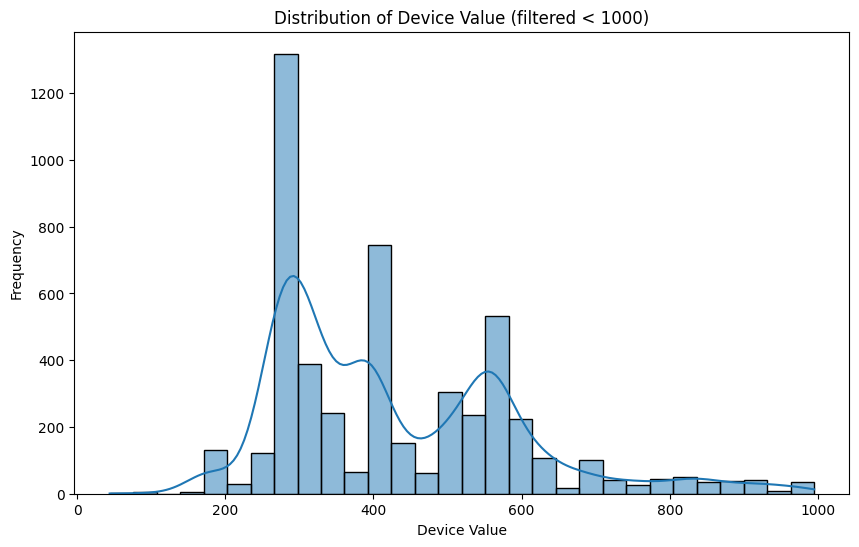

The distribution of DEVICE_VALUE (below 1000) is right-skewed, with a high frequency of lower-priced devices and a long tail extending towards higher values. It is unimodal, peaking at the lower end of the range.


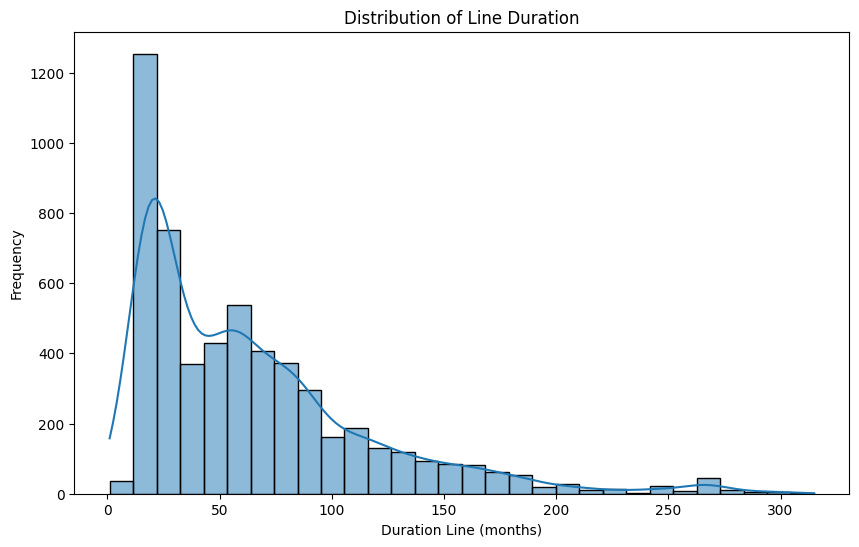

The distribution of DURATION_LINE is also right-skewed, showing that a large number of customers have had their line for a shorter period, with fewer customers having very long durations. It appears unimodal.


In [26]:
# Histogram for DEVICE_VALUE
plt.figure(figsize=(10, 6))
sns.histplot(df_clean[df_clean['DEVICE_VALUE'] < 1000]['DEVICE_VALUE'], bins=30, kde=True)
plt.title('Distribution of Device Value (filtered < 1000)')
plt.xlabel('Device Value')
plt.ylabel('Frequency')
plt.show()

# Short note on DEVICE_VALUE distribution
print("The distribution of DEVICE_VALUE (below 1000) is right-skewed, with a high frequency of lower-priced devices and a long tail extending towards higher values. It is unimodal, peaking at the lower end of the range.")

# Histogram for DURATION_LINE
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['DURATION_LINE'], bins=30, kde=True)
plt.title('Distribution of Line Duration')
plt.xlabel('Duration Line (months)')
plt.ylabel('Frequency')
plt.show()

# Short note on DURATION_LINE distribution
print("The distribution of DURATION_LINE is also right-skewed, showing that a large number of customers have had their line for a shorter period, with fewer customers having very long durations. It appears unimodal.")

When you want to compare histograms across two groups, it helps to draw outlines:

```python
sns.histplot(data=..., bins=20, fill=False)
```

Log scales can also help when values vary a lot:
- `plt.xscale("log")`
- `plt.yscale("log")`


**Your task (code + comment):**

Create **two** comparison plots (two separate figures):

1) Overlay histograms of **VOICE_TRAFFIC_MONTH_1** and **VOICE_TRAFFIC_MONTH_6** (same axes, add a legend)  
2) Overlay histograms of **DATA_TRAFFIC_MONTH_1** and **DATA_TRAFFIC_MONTH_6** (same axes, add a legend)

Requirements:
- Use a logarithmic scale on the **y-axis** for both plots
- Include title + axis labels + legend

After the plots, briefly describe how month 1 and month 6 differ. What might explain the difference?


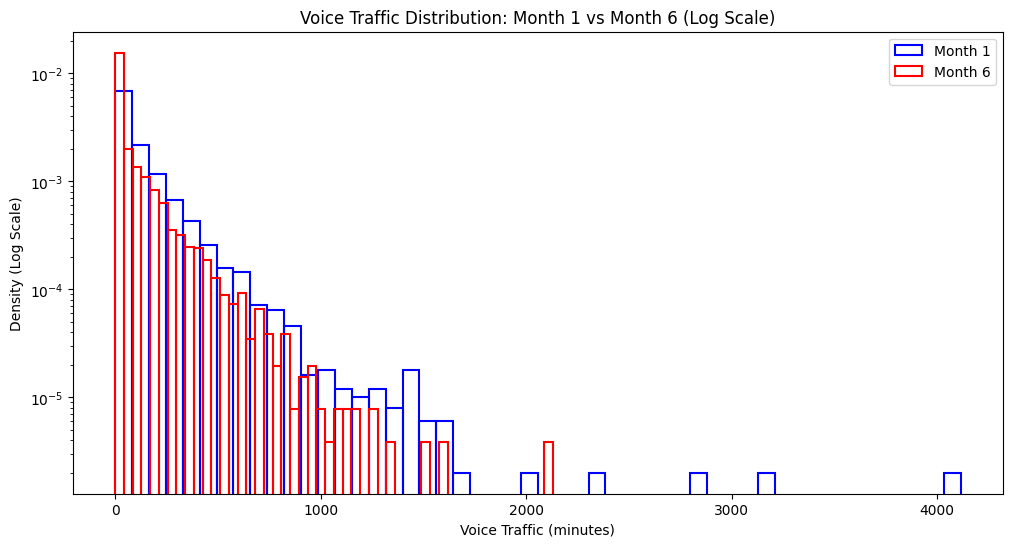

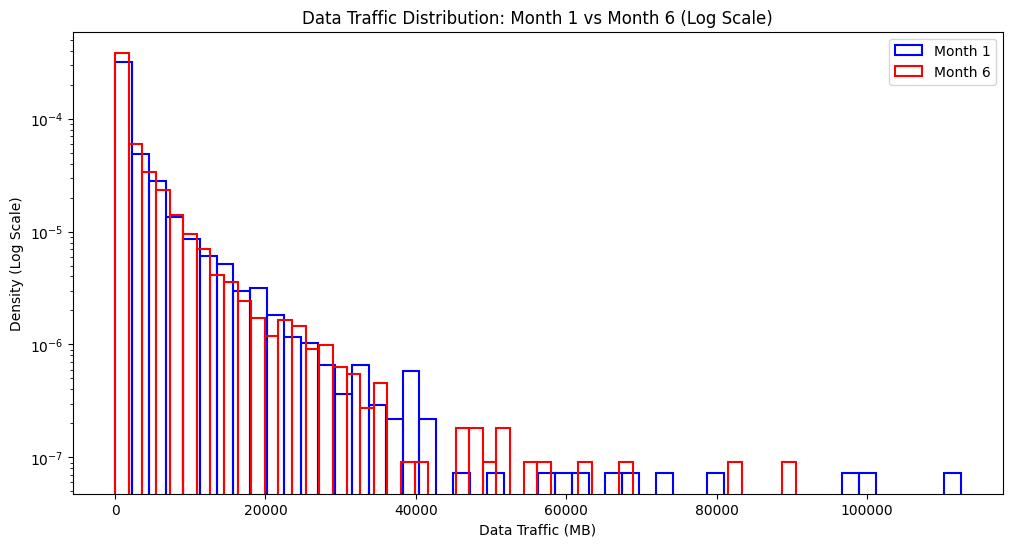


--- Differences between Month 1 and Month 6 ---
For both voice and data traffic, Month 6 generally shows a higher frequency of zero or very low usage compared to Month 1. The distributions remain heavily right-skewed. This could suggest that for some users, usage might drop off over time, or that the further back in history we go (Month 6), the more likely we are to capture periods of lower or non-existent usage, possibly due to customer behavior changes or data collection nuances over time.


In [27]:
# Overlay histograms of VOICE_TRAFFIC_MONTH_1 and VOICE_TRAFFIC_MONTH_6
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['VOICE_TRAFFIC_MONTH_1'], bins=50, color='blue', label='Month 1', fill=False, stat='density', linewidth=1.5)
sns.histplot(df_clean['VOICE_TRAFFIC_MONTH_6'], bins=50, color='red', label='Month 6', fill=False, stat='density', linewidth=1.5)
plt.yscale('log')
plt.title('Voice Traffic Distribution: Month 1 vs Month 6 (Log Scale)')
plt.xlabel('Voice Traffic (minutes)')
plt.ylabel('Density (Log Scale)')
plt.legend()
plt.show()

# Overlay histograms of DATA_TRAFFIC_MONTH_1 and DATA_TRAFFIC_MONTH_6
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['DATA_TRAFFIC_MONTH_1'], bins=50, color='blue', label='Month 1', fill=False, stat='density', linewidth=1.5)
sns.histplot(df_clean['DATA_TRAFFIC_MONTH_6'], bins=50, color='red', label='Month 6', fill=False, stat='density', linewidth=1.5)
plt.yscale('log')
plt.title('Data Traffic Distribution: Month 1 vs Month 6 (Log Scale)')
plt.xlabel('Data Traffic (MB)')
plt.ylabel('Density (Log Scale)')
plt.legend()
plt.show()

print("\n--- Differences between Month 1 and Month 6 ---")
print("For both voice and data traffic, Month 6 generally shows a higher frequency of zero or very low usage compared to Month 1. The distributions remain heavily right-skewed. This could suggest that for some users, usage might drop off over time, or that the further back in history we go (Month 6), the more likely we are to capture periods of lower or non-existent usage, possibly due to customer behavior changes or data collection nuances over time.")

Some variables have a strong right-skew (many small values, a few very large ones).
A common trick is to use a log transform. To safely handle zeros, use:

- `log(x + 1)`  (often implemented as `np.log1p(x)`)


**Your task (code):**  
Apply `log(x + 1)` to **VOICE_TRAFFIC_MONTH_1** (store the result in a new column),
then plot the new distribution.


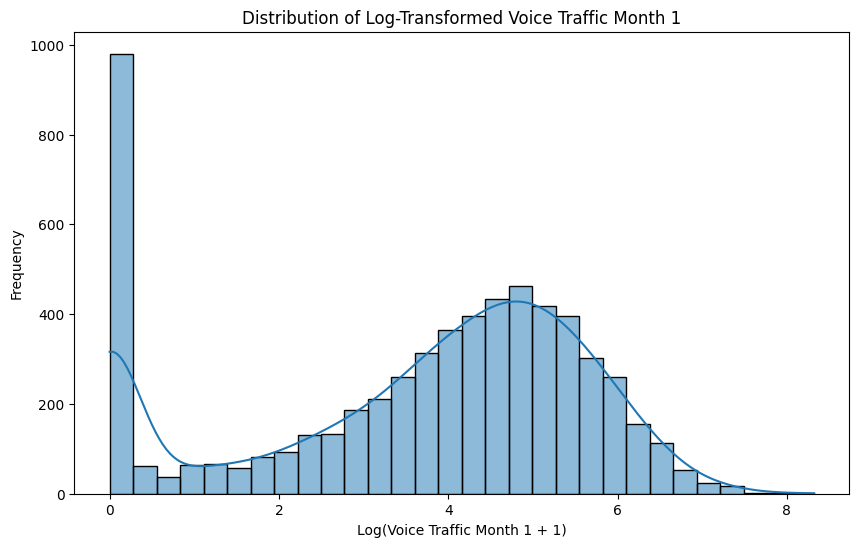

In [28]:
# Apply log(x + 1) transform to VOICE_TRAFFIC_MONTH_1
df_clean['VOICE_TRAFFIC_MONTH_1_LOG'] = np.log1p(df_clean['VOICE_TRAFFIC_MONTH_1'])

# Plot the new distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['VOICE_TRAFFIC_MONTH_1_LOG'], bins=30, kde=True)
plt.title('Distribution of Log-Transformed Voice Traffic Month 1')
plt.xlabel('Log(Voice Traffic Month 1 + 1)')
plt.ylabel('Frequency')
plt.show()

**Your task (code):**  
Create three boxplots (three separate figures is fine):

- **DATA_TRAFFIC_MONTH_6**
- **VOICE_TRAFFIC_MONTH_6**
- **BILLING_MONTH_6**

Add a title and a y-axis label for each plot.


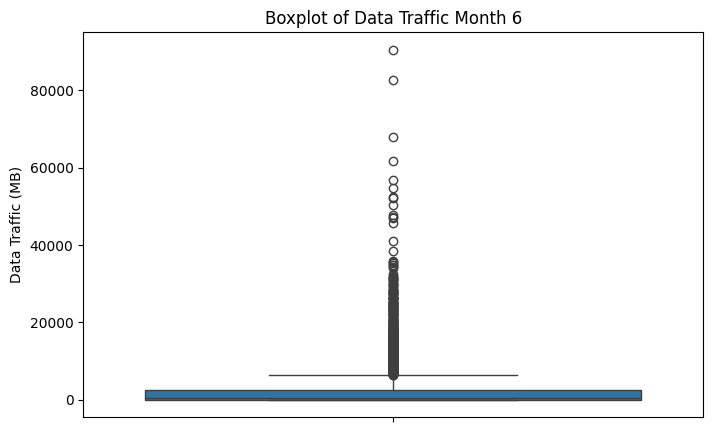

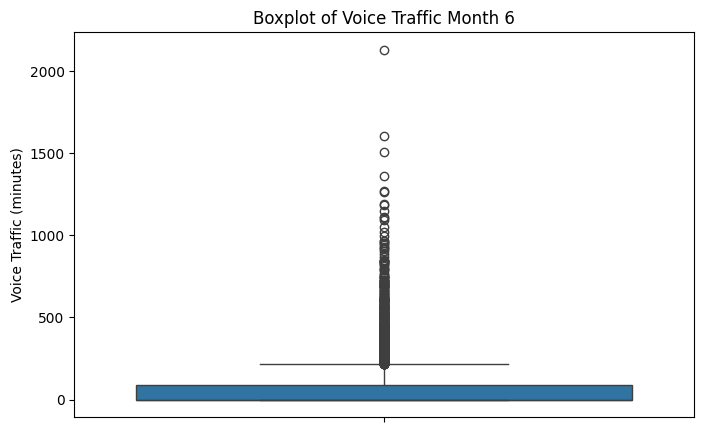

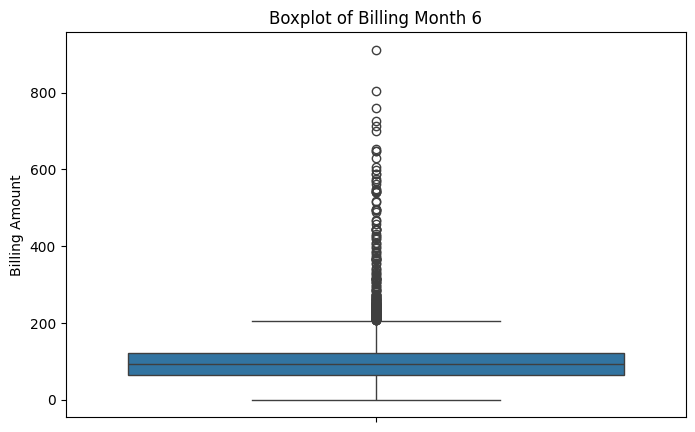

In [29]:
# Boxplot for DATA_TRAFFIC_MONTH_6
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_clean['DATA_TRAFFIC_MONTH_6'])
plt.title('Boxplot of Data Traffic Month 6')
plt.xlabel('') # Boxplots don't typically need an x-label if only one variable is plotted on y-axis
plt.ylabel('Data Traffic (MB)')
plt.show()

# Boxplot for VOICE_TRAFFIC_MONTH_6
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_clean['VOICE_TRAFFIC_MONTH_6'])
plt.title('Boxplot of Voice Traffic Month 6')
plt.xlabel('')
plt.ylabel('Voice Traffic (minutes)')
plt.show()

# Boxplot for BILLING_MONTH_6
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_clean['BILLING_MONTH_6'])
plt.title('Boxplot of Billing Month 6')
plt.xlabel('')
plt.ylabel('Billing Amount')
plt.show()

**Your task (short explanation):**  
Based on the boxplots, suggest a reasonable outlier threshold (or rule) for each variable.
Explain your choice in a few sentences.


Many columns here should be related (usage ↔ billing, billing ↔ device cost, duration ↔ behavior, etc.).
Correlations are a quick way to check these relationships.

In pandas you can compute a Pearson correlation matrix with:

```python
iinput_dataset.corr(method="pearson", numeric_only=True)
```

You can visualize a correlation matrix as an image (colors) using `plt.matshow(...)`.


**Your task (code):**  
Compute the Pearson correlation matrix for the numeric columns and display it as a color matrix using `matshow`.

Make the plot readable:
- add a title
- label the axes (column names)
- include a colorbar


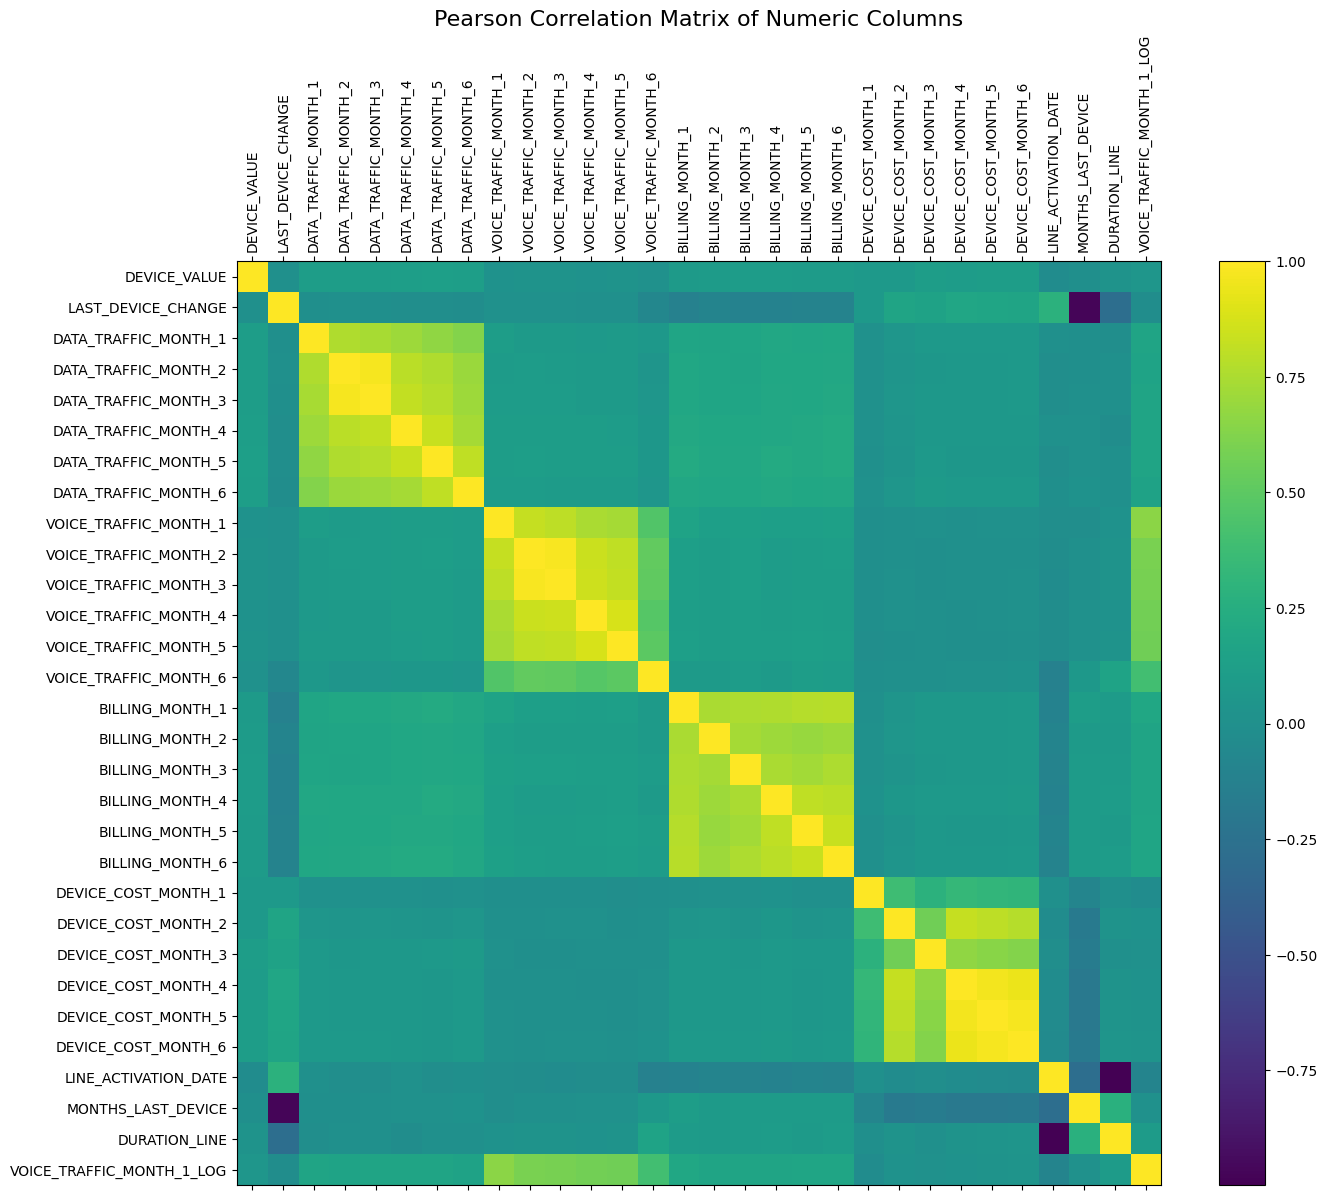

In [30]:
numeric_df = df_clean.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr(method="pearson")

fig, ax = plt.subplots(figsize=(15, 12)) # Create figure and axes explicitly
im = ax.matshow(correlation_matrix) # Plot on the axes

fig.colorbar(im, ax=ax) # Add colorbar to the axes

ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticks(range(len(correlation_matrix.columns)))
ax.set_yticklabels(correlation_matrix.columns)

ax.set_title('Pearson Correlation Matrix of Numeric Columns', fontsize=16)
plt.show()

**Your task (short explanation):**  
Pick 2–3 correlations that you find interesting (high, low, or surprising) and explain them.
For example: is billing more aligned with data traffic or voice traffic?


## 2.3. Date management and period calculation


Some “date” columns are stored as numbers like `20180703.0` (meaning 2018-07-03).
We will create a reference timeline to compute “how long ago” things happened.

Steps:
1) Find the most recent value in **LAST_DEVICE_CHANGE** and call that date `latest_change`.
2) Define `now = latest_change + 30 days` (a simple stand-in for “one month after the last observed change”).

Convert carefully:
- convert float → int → string
- parse the string with format `%Y%m%d`
- use a `datetime.timedelta` to add days

Expected print format:
```
2019-05-01 00:00:00
2019-05-31 00:00:00
```


**Your task (code):**  
Create and print the variables `latest_change` and `now` as described above.


In [31]:
# Find the most recent value in LAST_DEVICE_CHANGE
# Convert to int first to handle potential float representation of dates
latest_change_raw = df_clean['LAST_DEVICE_CHANGE'].max()

# Convert float to int, then to string for datetime parsing
# Use errors='coerce' to handle potential NaN values after max() if there are no valid dates
if pd.isna(latest_change_raw):
    print("LAST_DEVICE_CHANGE contains no valid dates to determine latest_change.")
    latest_change = None
    now = None
else:
    latest_change_str = str(int(latest_change_raw))
    latest_change = datetime.datetime.strptime(latest_change_str, '%Y%m%d')

    # Define 'now' as latest_change + 30 days
    now = latest_change + datetime.timedelta(days=30)

# Print the variables in the expected format
if latest_change and now:
    print(latest_change)
    print(now)

2019-05-01 00:00:00
2019-05-31 00:00:00


Next, convert the entire **LAST_DEVICE_CHANGE** column into real datetimes.

Example pattern:
```python
series_converted = pd.to_datetime(input_dataset["LAST_DEVICE_CHANGE"], format="%Y%m%d")
```

Then compute a “months since last device change” value:
- compute `now - series_converted` (a timedelta)
- divide by `30 * datetime.timedelta(days=1)` to get “months” (approximate)
- replace **MONTHS_LAST_DEVICE** with the resulting integer values


**Your task (code):**  
Replace **MONTHS_LAST_DEVICE** with the computed time gap (in ~30-day months) between **LAST_DEVICE_CHANGE** and `now`.


In [32]:
# Convert LAST_DEVICE_CHANGE to datetime objects, handling potential float/NaN values
series_converted = pd.to_datetime(df_clean['LAST_DEVICE_CHANGE'].astype(str).str.replace(r'\.0$', '', regex=True), format='%Y%m%d', errors='coerce')

# Compute the time difference (timedelta) between 'now' and the converted dates
time_difference = now - series_converted

# Get days difference, which will be float64 with NaNs
days_diff = time_difference.dt.days

# Calculate months. This will be a float64 Series with NaNs.
calculated_months = days_diff / 30

# Round the calculated months to the nearest integer. NaNs will remain NaNs.
rounded_months = calculated_months.round()

# Convert the rounded float64 Series to Int64, which handles NaNs as <NA>
months_since_last_device_change = rounded_months.astype('Int64')

# Replace MONTHS_LAST_DEVICE with the computed integer values
df_clean['MONTHS_LAST_DEVICE'] = months_since_last_device_change

**Your task (code + quick check):**  
Update **DURATION_LINE** in the same spirit:
compute the gap between **LINE_ACTIVATION_DATE** and `now`, then express it in ~30-day months.

After updating, take the **maximum** `DURATION_LINE` value and convert it to **years (approximately)**.
(A simple approximation is `years ≈ months / 12`.)


In [33]:
# Update DURATION_LINE
# Convert LINE_ACTIVATION_DATE to datetime objects, handling potential float/NaN values
series_converted_activation = pd.to_datetime(df_clean['LINE_ACTIVATION_DATE'].astype(str).str.replace(r'\.0$', '', regex=True), format='%Y%m%d', errors='coerce')

# Compute the time difference (timedelta) between 'now' and the converted dates
time_difference_activation = now - series_converted_activation

# Get days difference, which will be float64 with NaNs
days_diff_activation = time_difference_activation.dt.days

# Calculate months. This will be a float64 Series with NaNs.
calculated_months_activation = days_diff_activation / 30

# Round the calculated months to the nearest integer. NaNs will remain NaNs.
rounded_months_activation = calculated_months_activation.round()

# Convert the rounded float64 Series to Int64, which handles NaNs as <NA>
duration_line_months = rounded_months_activation.astype('Int64')

# Replace DURATION_LINE with the computed integer values
df_clean['DURATION_LINE'] = duration_line_months

# Quick check: maximum DURATION_LINE value converted to years
max_duration_months = df_clean['DURATION_LINE'].max()
if pd.notna(max_duration_months):
    max_duration_years = max_duration_months / 12
    print(f"Maximum DURATION_LINE (in months): {max_duration_months}")
    print(f"Maximum DURATION_LINE (in years, approximately): {max_duration_years:.1f}")
else:
    print("DURATION_LINE is entirely missing or cannot be computed.")

Maximum DURATION_LINE (in months): 321
Maximum DURATION_LINE (in years, approximately): 26.8


## 2.4. Standardization and scaling of numerical variables


Scaling changes the numeric range of a variable.

Two common options:
- **Standardization (z-score):** mean becomes 0 and standard deviation becomes 1
- **Min–max scaling:** values are mapped into the range [0, 1]

Example:

```python
test_data = [{"x": -1.0}, {"x": 2.0}, {"x": 3.0}, {"x": 6.0}]
test_input_dataset = pd.DataFrame(test_data)
display(test_input_dataset)

test_input_dataset["x_standardized"] = StandardScaler().fit_transform(test_input_dataset[["x"]])
test_input_dataset["x_minmaxscaled"] = MinMaxScaler().fit_transform(test_input_dataset[["x"]])
display(test_input_dataset)
```


**Your task (code + plots):**  
For these variables:
- **DATA_TRAFFIC_MONTH_1**
- **VOICE_TRAFFIC_MONTH_1**
- **BILLING_MONTH_1**

Create:
- a standardized version (using `StandardScaler`)
- a min–max scaled version (using `MinMaxScaler`)

Store the results in new columns (choose clear names), then plot the distributions of the scaled columns.
Remember: title + axis labels for every plot.


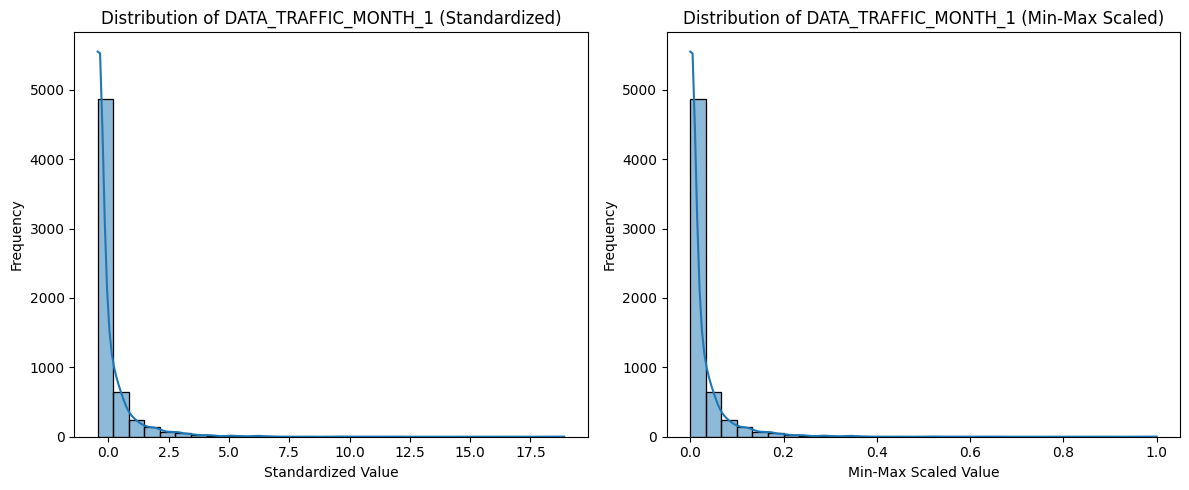

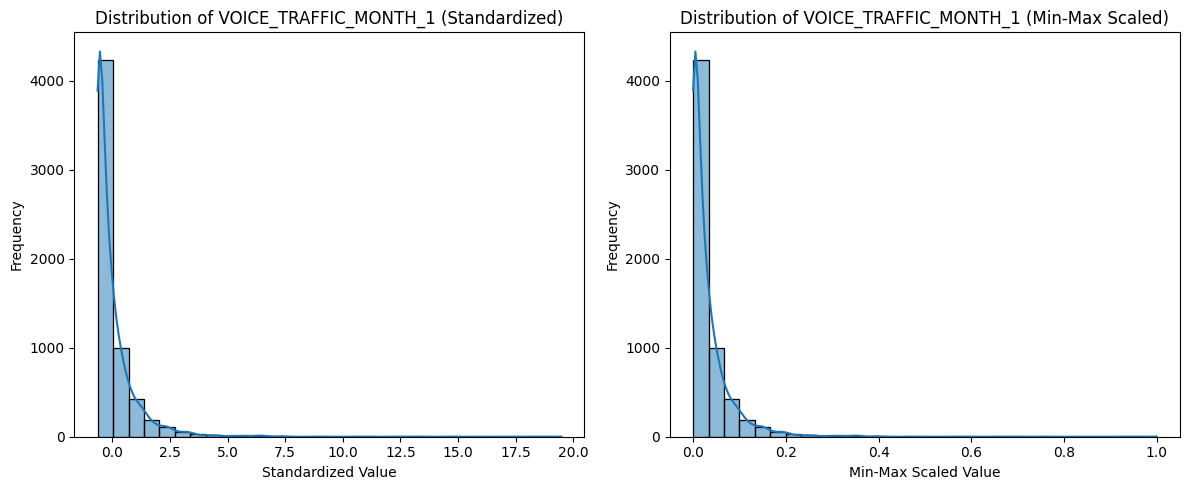

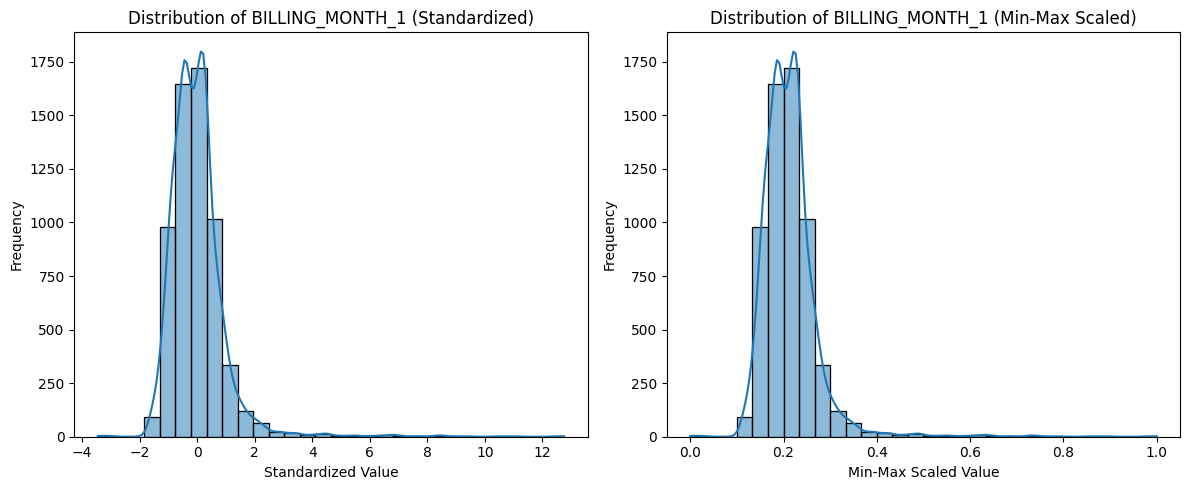

In [34]:
columns_to_scale = [
    'DATA_TRAFFIC_MONTH_1',
    'VOICE_TRAFFIC_MONTH_1',
    'BILLING_MONTH_1'
]

# Initialize scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

for col in columns_to_scale:
    # Standardize
    df_clean[f'{col}_STANDARDIZED'] = scaler_standard.fit_transform(df_clean[[col]])

    # Min-Max Scale
    df_clean[f'{col}_MINMAXSCALED'] = scaler_minmax.fit_transform(df_clean[[col]])

    # Plot distributions of scaled columns
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df_clean[f'{col}_STANDARDIZED'], bins=30, kde=True)
    plt.title(f'Distribution of {col} (Standardized)')
    plt.xlabel('Standardized Value')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.histplot(df_clean[f'{col}_MINMAXSCALED'], bins=30, kde=True)
    plt.title(f'Distribution of {col} (Min-Max Scaled)')
    plt.xlabel('Min-Max Scaled Value')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

## 2.5. Convert categorical columns to dummy binary variables


Many ML models expect numbers, but device brand/model columns are text categories.
A simple first step is **label encoding**: map each distinct category to an integer.

Example:

```python
colors = pd.Series(["Blue", "Red", "Orange", "Blue"])
encoded = LabelEncoder().fit_transform(colors)
```


**Your task (code):**  
Create a new column **PREVIOUS_DEVICE_BRAND_INT_ENCODED** containing an integer-encoded version of **PREVIOUS_DEVICE_BRAND**.


In [35]:
label_encoder = LabelEncoder()
df_clean['PREVIOUS_DEVICE_BRAND_INT_ENCODED'] = label_encoder.fit_transform(df_clean['PREVIOUS_DEVICE_BRAND'])

Label encoding is compact, but it can accidentally suggest an ordering (e.g., 0 < 1 < 2).
A safer option is **one-hot encoding** (dummy variables): one binary column per category.

Example:

```python
colors_input_dataset = pd.DataFrame({"color": ["Blue", "Red", "Orange", "Blue"]})
dummies = pd.get_dummies(colors_input_dataset["color"], prefix="color")
colors_input_dataset = colors_input_dataset.join(dummies)
display(colors_input_dataset)
```


**Your task (code):**  
Convert **PREVIOUS_DEVICE_MANUF** into dummy (one-hot) columns and join them back to your working dataframe.
Use a clear prefix so the new columns are easy to recognize.


In [36]:
# Convert PREVIOUS_DEVICE_MANUF into dummy (one-hot) columns
dummies = pd.get_dummies(df_clean['PREVIOUS_DEVICE_MANUF'], prefix='PREV_MANUF')

# Join the dummy variables back to the working dataframe
df_clean = df_clean.join(dummies)

## 2.6. Feature generation


You have six months of history for usage and billing.
Instead of keeping all six months separately, you can create summary features (mean, max, trend, etc.).
These summaries often make models simpler and more stable.


**Your task (code):**  
From the 6-month columns, create at least these aggregate features:

- **DATA_TRAFFIC_MEAN** from `DATA_TRAFFIC_MONTH_1 … DATA_TRAFFIC_MONTH_6`
- **VOICE_TRAFFIC_MEAN** from `VOICE_TRAFFIC_MONTH_1 … VOICE_TRAFFIC_MONTH_6`
- **BILLING_MEAN** from `BILLING_MONTH_1 … BILLING_MONTH_6`
- **DEVICE_COST_MEAN** from `DEVICE_COST_MONTH_1 … DEVICE_COST_MONTH_6`

(Optional: also create `*_STD` features if you want.)


In [37]:
# Aggregate features for DATA_TRAFFIC
data_traffic_cols = [f'DATA_TRAFFIC_MONTH_{i}' for i in range(1, 7)]
df_clean['DATA_TRAFFIC_MEAN'] = df_clean[data_traffic_cols].mean(axis=1)

# Aggregate features for VOICE_TRAFFIC
voice_traffic_cols = [f'VOICE_TRAFFIC_MONTH_{i}' for i in range(1, 7)]
df_clean['VOICE_TRAFFIC_MEAN'] = df_clean[voice_traffic_cols].mean(axis=1)

# Aggregate features for BILLING
billing_cols = [f'BILLING_MONTH_{i}' for i in range(1, 7)]
df_clean['BILLING_MEAN'] = df_clean[billing_cols].mean(axis=1)

# Aggregate features for DEVICE_COST
device_cost_cols = [f'DEVICE_COST_MONTH_{i}' for i in range(1, 7)]
df_clean['DEVICE_COST_MEAN'] = df_clean[device_cost_cols].mean(axis=1)

**Your task (code + plot):**  
Create a feature **DEVICE_COST_TO_BILLING_RATIO**:

```
DEVICE_COST_TO_BILLING_RATIO = DEVICE_COST_MEAN / BILLING_MEAN
```

Handle division-by-zero in a sensible way (e.g., keep it as NaN or replace infinities).
Then plot the distribution of this ratio.


**Your task (short explanation):**  
Describe the distribution of **DEVICE_COST_TO_BILLING_RATIO**.
Does it look symmetric, skewed, heavy-tailed, or something else?


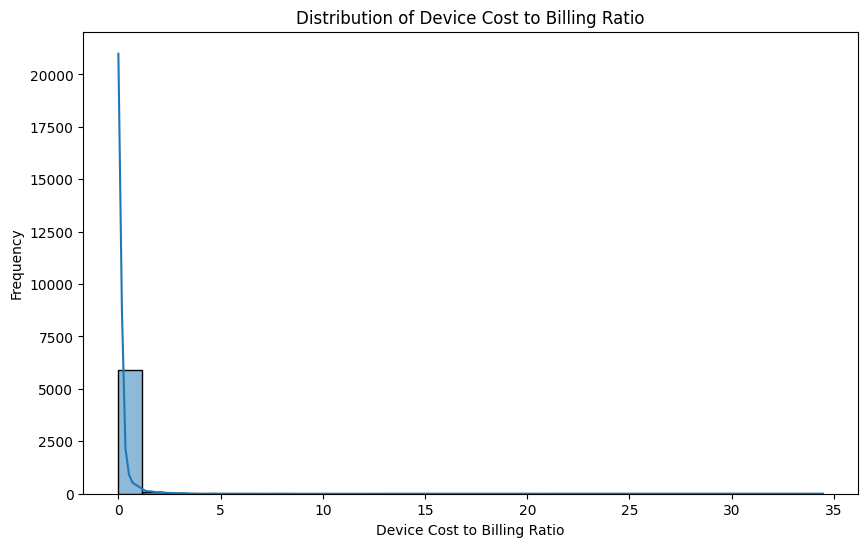

In [38]:
# Create DEVICE_COST_TO_BILLING_RATIO
df_clean['DEVICE_COST_TO_BILLING_RATIO'] = df_clean['DEVICE_COST_MEAN'] / df_clean['BILLING_MEAN']

# Replace infinities (resulting from division by zero) with NaN
df_clean['DEVICE_COST_TO_BILLING_RATIO'] = df_clean['DEVICE_COST_TO_BILLING_RATIO'].replace([np.inf, -np.inf], np.nan)

# Plot the distribution of this ratio
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['DEVICE_COST_TO_BILLING_RATIO'].dropna(), bins=30, kde=True)
plt.title('Distribution of Device Cost to Billing Ratio')
plt.xlabel('Device Cost to Billing Ratio')
plt.ylabel('Frequency')
plt.show()

## 2.7. Text parsing/processing


Some columns bundle multiple pieces of information into a single text string.
Here, **PURCHASED_DEVICE** often looks like “manufacturer + model” (and sometimes more).

We will split that text into separate columns so we can analyze and model it more easily.

Hint: pandas string tools like `Series.str.split(...)` are very handy for this.


**Your task (code):**  
Parse **PURCHASED_DEVICE** and create three new columns:

- **PURCHASED_DEVICE_MANUFACTURER**
- **PURCHASED_DEVICE_BRAND**
- **PURCHASED_DEVICE_MODEL**

Use a simple rule that works for most rows (it doesn’t need to be perfect, but it should be consistent).


In [39]:
# Step 1: Extract the part after the initial ID and underscore
# This assumes the format 'CODE_MANUFACTURER MODEL_NAME ...'
device_info_split = df_clean['PURCHASED_DEVICE'].str.split('_', n=1, expand=True)

# The actual device information starts from the second part (index 1)
# Handle cases where splitting might result in None if no underscore is present
device_info = device_info_split[1]

# Step 2: Split device info into manufacturer and model
# Use .str.split(' ', n=1, expand=True) to split by the first space only
manufacturer_model_split = device_info.str.split(' ', n=1, expand=True)

# Assign the new columns
df_clean['PURCHASED_DEVICE_MANUFACTURER'] = manufacturer_model_split[0]
# Fill NaN models with an empty string for consistency if no model part exists
df_clean['PURCHASED_DEVICE_MODEL'] = manufacturer_model_split[1].fillna('')

# Step 3: Derive PURCHASED_DEVICE_BRAND from the manufacturer
# Normalize manufacturer names to match common brands (observed in PREVIOUS_DEVICE_BRAND)
# Convert to uppercase for consistent matching
extracted_manufacturer_upper = df_clean['PURCHASED_DEVICE_MANUFACTURER'].str.upper()

def map_to_brand(manufacturer_name):
    if pd.isna(manufacturer_name):
        return 'Outros'
    if 'SAMSUNG' in str(manufacturer_name):
        return 'Samsung'
    elif 'APPLE' in str(manufacturer_name) or 'IPHONE' in str(manufacturer_name):
        return 'Apple'
    elif 'MOTOROLA' in str(manufacturer_name) or 'LENOVO' in str(manufacturer_name):
        return 'Motorola'
    elif 'LG' in str(manufacturer_name):
        return 'LG'
    else:
        return 'Outros'

df_clean['PURCHASED_DEVICE_BRAND'] = extracted_manufacturer_upper.apply(map_to_brand)

# Display the head of the new columns to verify
display(df_clean[['PURCHASED_DEVICE', 'PURCHASED_DEVICE_MANUFACTURER', 'PURCHASED_DEVICE_BRAND', 'PURCHASED_DEVICE_MODEL']].head())

,PURCHASED_DEVICE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_BRAND,PURCHASED_DEVICE_MODEL
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,LG,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,LG,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,MOTOROLA,Motorola,XT1922 SMARTPHONE INDIGO
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,LG,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,MOTOROLA,Motorola,XT1922 SMARTPHONE INDIGO


**Your task (code):**  
Create and display two tables:

1) Number of purchased devices per manufacturer (using **PURCHASED_DEVICE_MANUFACTURER**)  
2) Number of previous devices per manufacturer (using **PREVIOUS_DEVICE_MANUF**)

Sort both tables from most common to least common.


In [40]:
# Number of purchased devices per manufacturer
purchased_manufacturer_counts = df_clean['PURCHASED_DEVICE_MANUFACTURER'].value_counts()
purchased_manufacturer_df = pd.DataFrame({
    'Manufacturer': purchased_manufacturer_counts.index,
    'Count': purchased_manufacturer_counts.values
})
display(pd.DataFrame({'Metric': ['Purchased Devices per Manufacturer']}).set_index('Metric'))
display(purchased_manufacturer_df)

# Number of previous devices per manufacturer
previous_manufacturer_counts = df_clean['PREVIOUS_DEVICE_MANUF'].value_counts()
previous_manufacturer_df = pd.DataFrame({
    'Manufacturer': previous_manufacturer_counts.index,
    'Count': previous_manufacturer_counts.values
})
display(pd.DataFrame({'Metric': ['Previous Devices per Manufacturer']}).set_index('Metric'))
display(previous_manufacturer_df)

""
Metric
Purchased Devices per Manufacturer


,Manufacturer,Count
0,LG,3598
1,SAMSUNG,1111
2,MOTOROLA,642
3,APPLE,461
4,ALCATEL,269
5,ASUS,2


""
Metric
Previous Devices per Manufacturer


,Manufacturer,Count
0,Samsung Korea,1911
1,Apple Inc,1524
2,"Motorola Mobility LLC, a Lenovo Company",869
3,LG Electronics Inc.,506
4,TCL Communication Ltd,282
...,...,...
63,Fibocom Wireless Inc,1
64,Topmax Glory Limited,1
65,HK Elephone Communication Tech Co Limited,1
66,HTC Corporation,1


## 2.8. Splitting and sampling a dataset


Before training a model, we usually split data into:
- a **training** set (to fit the model)
- a **testing** set (to evaluate how well it generalizes)

Common split ratios are 80/20 or 70/30.


**Your task (code):**  
Split your dataset into two parts:
- 70% of rows → training set
- 30% of rows → testing set

Use a fixed `random_state` so results are reproducible.


In [41]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (70%) and testing (30%) sets
df_train, df_test = train_test_split(df_clean, test_size=0.3, random_state=42)

print(f"Training set shape: {df_train.shape}")
print(f"Testing set shape: {df_test.shape}")

Training set shape: (4258, 117)
Testing set shape: (1825, 117)


**Your task (code + short explanation):**

1) Compute descriptive statistics (mean, std, min, max, 25%, 50%, 75%) for **DATA_TRAFFIC_MONTH_1**
   in both the training set and the testing set.
2) Write a short comment: do the statistics look similar? If not, what might be the reason?


In [42]:
# Compute descriptive statistics for DATA_TRAFFIC_MONTH_1 in the training set
print("Descriptive statistics for DATA_TRAFFIC_MONTH_1 in Training Set:")
display(df_train['DATA_TRAFFIC_MONTH_1'].describe())

# Compute descriptive statistics for DATA_TRAFFIC_MONTH_1 in the testing set
print("\nDescriptive statistics for DATA_TRAFFIC_MONTH_1 in Testing Set:")
display(df_test['DATA_TRAFFIC_MONTH_1'].describe())

# Short comment on similarity
print("\nComment: The descriptive statistics (mean, std, min, max, quartiles) for DATA_TRAFFIC_MONTH_1 are very similar between the training and testing sets. This indicates that the `train_test_split` function successfully created two subsets with comparable distributions, which is crucial for building a reliable machine learning model.")

Descriptive statistics for DATA_TRAFFIC_MONTH_1 in Training Set:


count      4258.000000
mean       2636.448941
std        5977.518486
min           0.000000
25%           0.000000
50%         408.535585
75%        2740.136000
max      100259.960000
Name: DATA_TRAFFIC_MONTH_1, dtype: float64


Descriptive statistics for DATA_TRAFFIC_MONTH_1 in Testing Set:


count      1825.000000
mean       2451.479290
std        5400.892553
min           0.000000
25%           0.000000
50%         322.801090
75%        2702.889900
max      112421.170000
Name: DATA_TRAFFIC_MONTH_1, dtype: float64


Comment: The descriptive statistics (mean, std, min, max, quartiles) for DATA_TRAFFIC_MONTH_1 are very similar between the training and testing sets. This indicates that the `train_test_split` function successfully created two subsets with comparable distributions, which is crucial for building a reliable machine learning model.


# 3. Comparing iPhone and Samsung J series users


Final mini-analysis: compare two user groups.

Build one group with customers who bought an **Apple iPhone** and another group with customers who bought a **Samsung J-series** phone.
(A practical rule: iPhone → string contains “iPhone”; Samsung J-series → string contains “Samsung J”.)

Then compare a few variables to see how the groups differ.


**Your task (code):**  
Create two dataframes:
- one containing only the rows for Apple iPhone buyers
- one containing only the rows for Samsung J-series buyers

(Make your filter rule explicit in code.)


In [43]:
# Create dataframe for Apple iPhone buyers
df_iphone_buyers = df_clean[df_clean['PURCHASED_DEVICE'].str.contains('iPhone', case=False, na=False)].copy()

# Create dataframe for Samsung J-series buyers
df_samsung_j_buyers = df_clean[df_clean['PURCHASED_DEVICE'].str.contains('Samsung J', case=False, na=False)].copy()

print(f"Number of Apple iPhone buyers: {df_iphone_buyers.shape[0]}")
print(f"Number of Samsung J-series buyers: {df_samsung_j_buyers.shape[0]}")

Number of Apple iPhone buyers: 461
Number of Samsung J-series buyers: 867


**Your task (code):**  
Choose 2–3 variables and compare the two groups by plotting overlaid histograms (include a legend).
Good candidates include:
- `DEVICE_VALUE`
- `BILLING_MEAN` (if you created it)
- `DATA_TRAFFIC_MEAN` / `VOICE_TRAFFIC_MEAN` (if you created them)


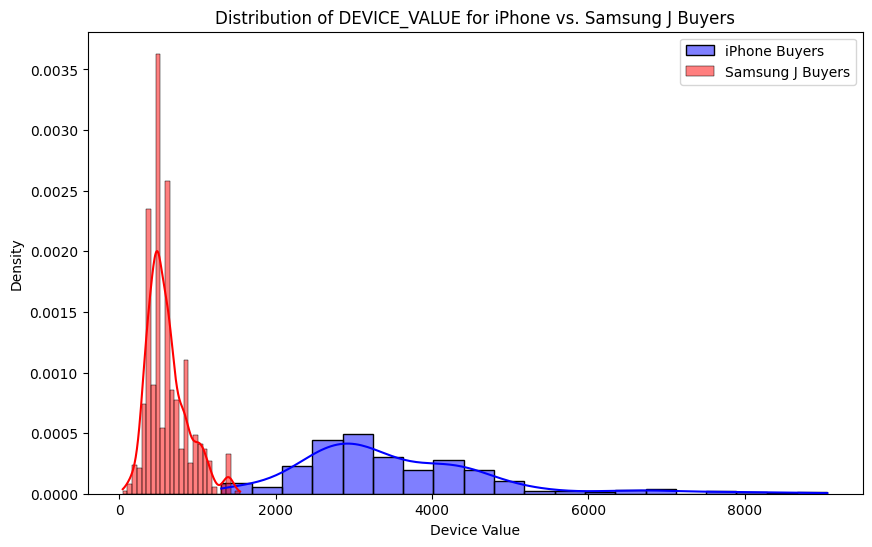

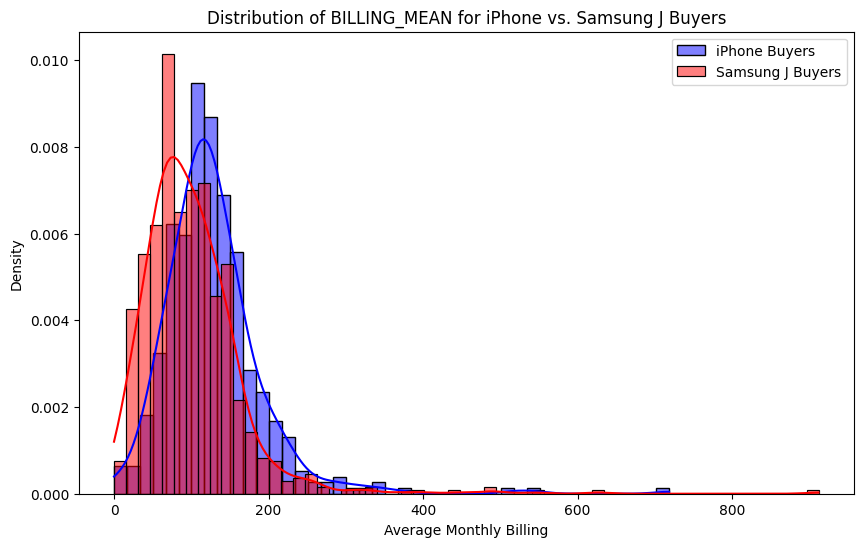

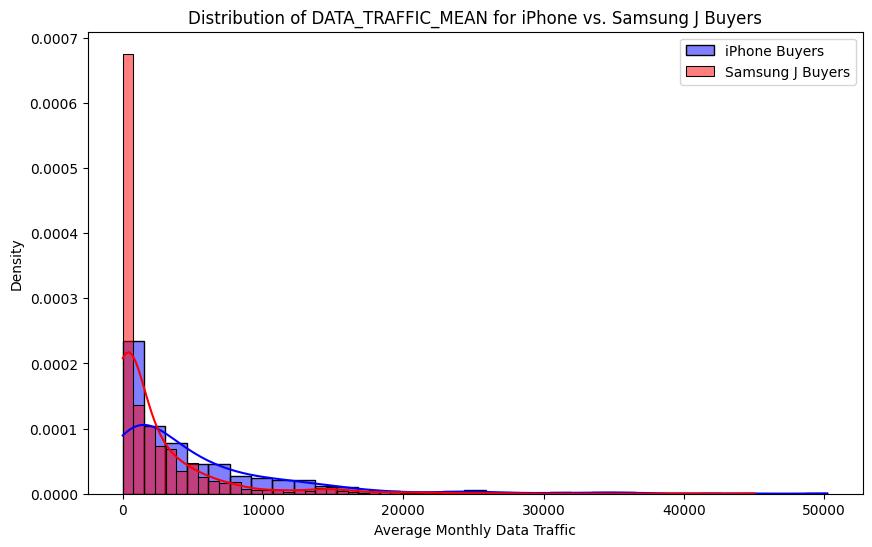

In [44]:
# Overlay histograms for DEVICE_VALUE
plt.figure(figsize=(10, 6))
sns.histplot(df_iphone_buyers['DEVICE_VALUE'].dropna(), color='blue', label='iPhone Buyers', kde=True, stat='density', alpha=0.5)
sns.histplot(df_samsung_j_buyers['DEVICE_VALUE'].dropna(), color='red', label='Samsung J Buyers', kde=True, stat='density', alpha=0.5)
plt.title('Distribution of DEVICE_VALUE for iPhone vs. Samsung J Buyers')
plt.xlabel('Device Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# Overlay histograms for BILLING_MEAN
plt.figure(figsize=(10, 6))
sns.histplot(df_iphone_buyers['BILLING_MEAN'].dropna(), color='blue', label='iPhone Buyers', kde=True, stat='density', alpha=0.5)
sns.histplot(df_samsung_j_buyers['BILLING_MEAN'].dropna(), color='red', label='Samsung J Buyers', kde=True, stat='density', alpha=0.5)
plt.title('Distribution of BILLING_MEAN for iPhone vs. Samsung J Buyers')
plt.xlabel('Average Monthly Billing')
plt.ylabel('Density')
plt.legend()
plt.show()

# Overlay histograms for DATA_TRAFFIC_MEAN
plt.figure(figsize=(10, 6))
sns.histplot(df_iphone_buyers['DATA_TRAFFIC_MEAN'].dropna(), color='blue', label='iPhone Buyers', kde=True, stat='density', alpha=0.5)
sns.histplot(df_samsung_j_buyers['DATA_TRAFFIC_MEAN'].dropna(), color='red', label='Samsung J Buyers', kde=True, stat='density', alpha=0.5)
plt.title('Distribution of DATA_TRAFFIC_MEAN for iPhone vs. Samsung J Buyers')
plt.xlabel('Average Monthly Data Traffic')
plt.ylabel('Density')
plt.legend()
plt.show()

**Your task (short explanation):**  
Summarize the main differences you observed between iPhone buyers and Samsung J-series buyers.
Keep it concrete: refer to the plots and mention directions (higher/lower) rather than vague statements.


# DELIVER (individually)

Submit **one zip file** that contains:
- this notebook (`.ipynb`) with all your code and explanations
- any extra files you generated (if any)

Make sure the notebook runs from top to bottom without errors.

## Extra credit (optional)

Build a simple classifier to predict **PURCHASED_DEVICE_MANUFACTURER** using these input variables:

1. PREVIOUS_DEVICE_MODEL  
2. PREVIOUS_DEVICE_BRAND  
3. MONTHS_LAST_DEVICE  
4. BILLING_MONTH_1  

Train/evaluate it with a train/test split and report the accuracy.

Then add **one more input feature** (your choice), retrain, and check whether accuracy improves.
Clearly show:
- which feature you added
- the accuracy before and after


**Academic honesty statement (required):**

I confirm that I completed this practice on my own, and that the code and explanations in this notebook reflect my own work.
If I used any external help (including an AI tool) for hints or syntax reminders, I reviewed it carefully, wrote the final solution myself,
and I can explain it if asked.
